In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("cleaned_costco_data.csv")
df.columns = df.columns.str.strip().str.lower()
df['price'] = pd.to_numeric(df['price'], errors='coerce')

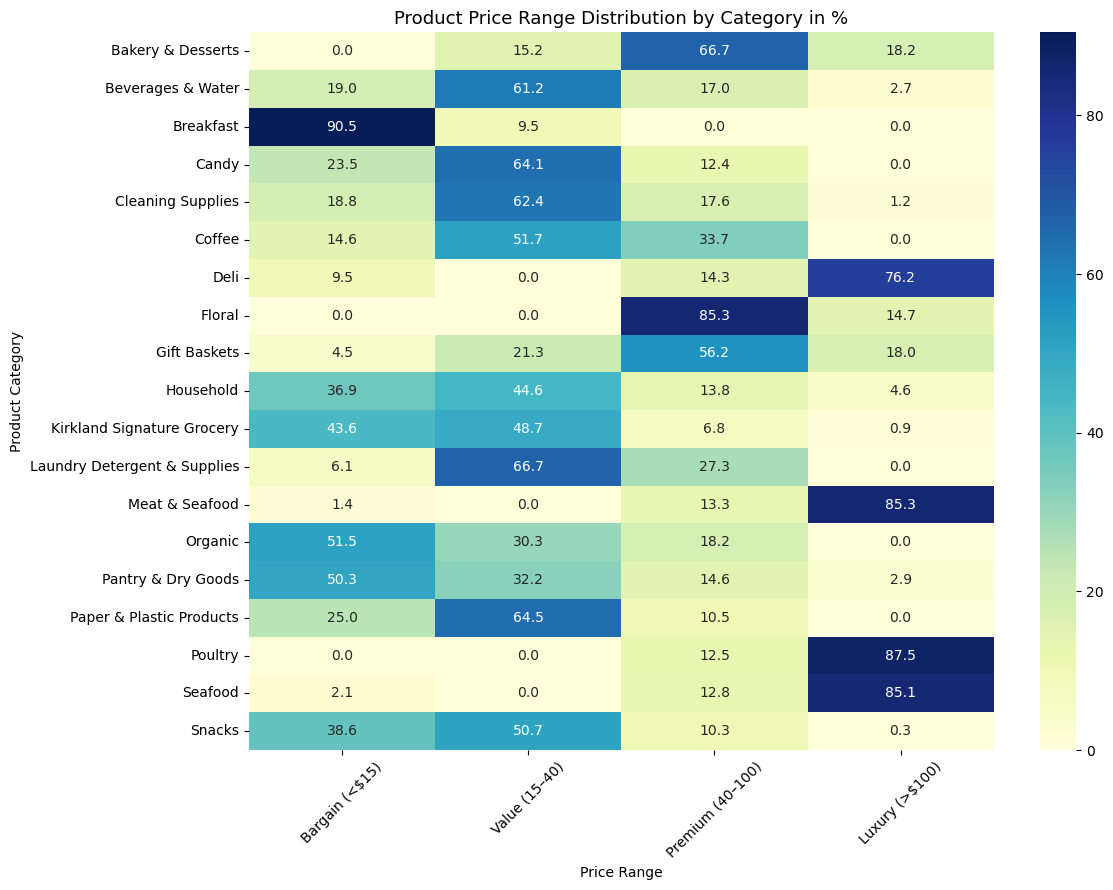

In [36]:
#price range
def price_ranges(price):
    if pd.isna(price):
        return None 
    elif price < 15:
        return 'Bargain (<$15)'
    elif 15 <= price <= 40:
        return 'Value (15–40)'
    elif 40 < price <= 100:
        return 'Premium (40–100)'
    else:
        return 'Luxury (>$100)'

df['price_ranges'] = df['price'].apply(price_ranges)
df = df.dropna(subset=['price_ranges'])

#product Count by Category & Price Range)
price_dist = df.groupby(['sub category', 'price_ranges']).size().unstack().fillna(0)

# Reorder price range columns (from lowest to highest)
ordered_ranges = ['Bargain (<$15)', 'Value (15–40)', 'Premium (40–100)', 'Luxury (>$100)']
price_dist = price_dist[ordered_ranges]

#by category use % of products per price range
percent_dist = price_dist.div(price_dist.sum(axis=1), axis=0) * 100

#heatmap
plt.figure(figsize=(12,9))
sns.heatmap(percent_dist, annot=True, fmt='.1f', cmap='YlGnBu')
plt.title("Product Price Range Distribution by Category in %", fontsize=13)
plt.xlabel("Price Range")
plt.ylabel("Product Category")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()